<h1>Lab | Feature extraction</h1>

For this lab, we will be using the same dataset we used in the previous labs. We recommend using the same notebook since you will be reusing the same variables you previous created and used in labs.

<h2>Instructions</h2>

1. Open the categoricals variable we created before.

    categoricals = data.select_dtypes(np.object)
    
    categoricals.head()


2. Plot all the categorical variables with the proper plot. What can you see?

3. There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?

4. Plot time variable. Can you extract something from it?

In [1]:
# 1. Open the categoricals variable we created before.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
categoricals = data.select_dtypes(object)
# dropping column 'Customer' (it's not really categorical column, it's unique like index)
categoricals = categoricals.drop(columns=['Customer'])
categoricals.head()

,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


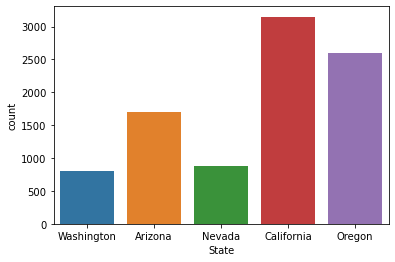

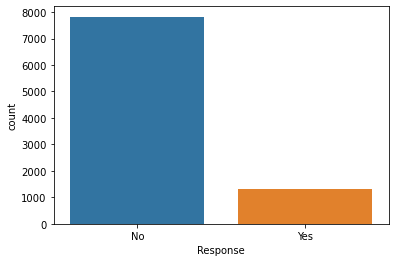

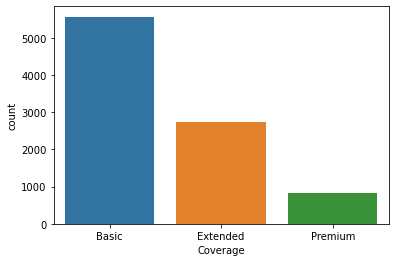

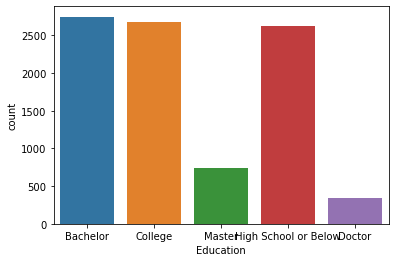

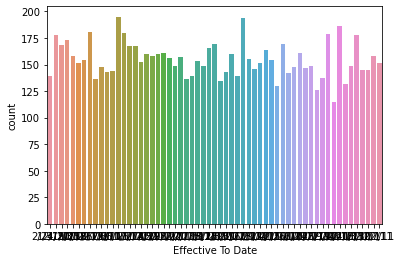

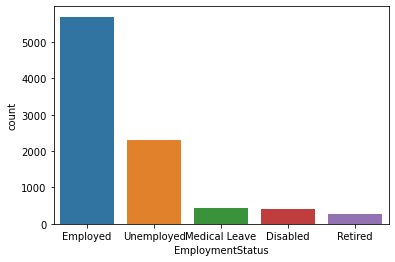

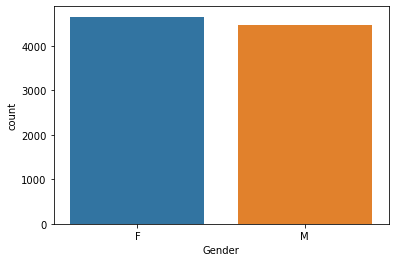

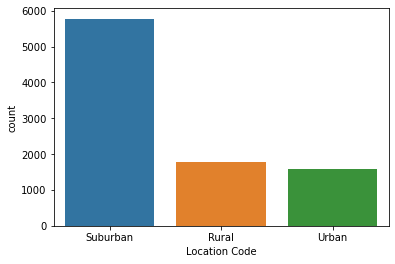

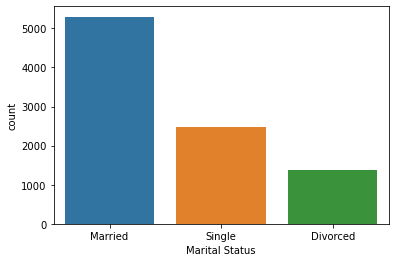

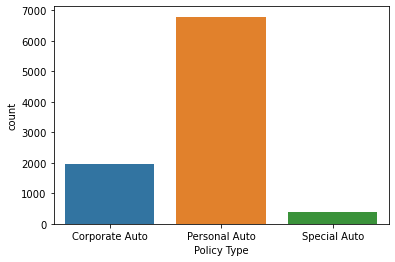

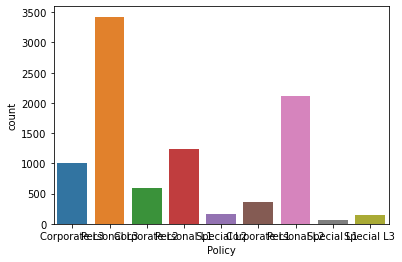

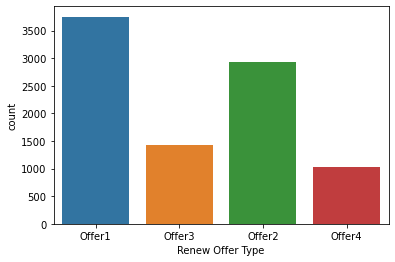

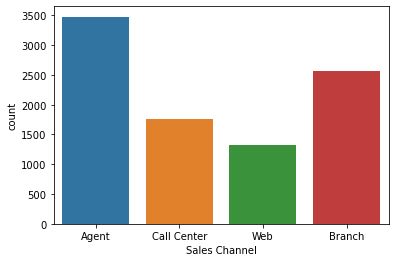

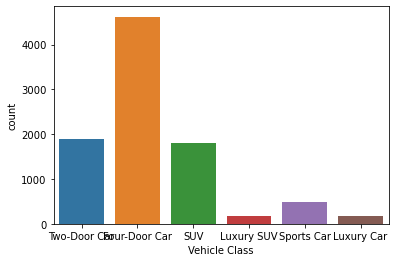

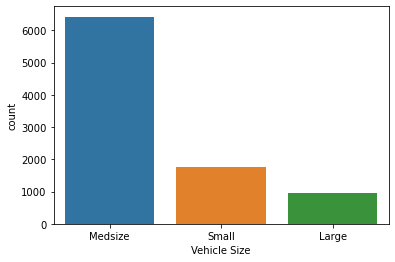

In [5]:
for column_name in categoricals.columns:
    plt.figure()
    sns.countplot(x=categoricals[column_name])
    plt.show()

We can see that different columns have different distributions. Some of them have only 2 values, and some of them have a lot. For example, as we can see, the column 'Effective To Date' have too many values and we may want to drop it from 'categoricals' or use it later to group data by a particular period of time.

In [6]:
# 3. There might be some columns that seem to be redundant, check their values to be sure.
# What should we do with them?

We can see that columns 'Policy' and 'Policy Type' have duplicated info, but column Policy has a fuller version of this info, so we can drop column 'Policy Type'.

In [7]:
categoricals = categoricals.drop(columns=['Policy Type'])
categoricals.head()

,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal L1,Offer1,Agent,Four-Door Car,Medsize


Also, we can replace some of the values of the columns with the others to make the dataset easier to encode (as we did it in "Cleaning categorical data" lab).

In [8]:
categoricals['EmploymentStatus'] = categoricals['EmploymentStatus'].replace({'Medical Leave':'Unemployed','Disabled':'Unemployed','Retired':'Unemployed'})
categoricals['Vehicle Class'] = categoricals['Vehicle Class'].replace({'Sports Car':'Other','Luxury SUV':'Other','Luxury Car':'Other'})
categoricals['Marital Status'] = categoricals['Marital Status'].replace({'Divorced':'Single'})
categoricals['Education'] = categoricals['Education'].replace({'Master':'Higher than Bachelor', 'Doctor':'Higher than Bachelor'})


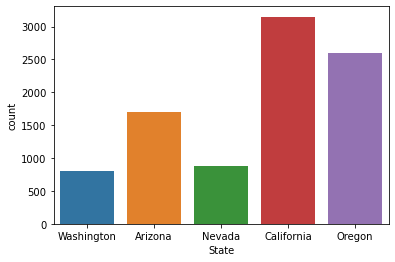

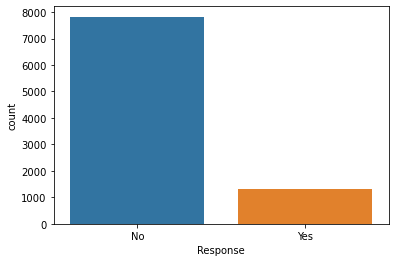

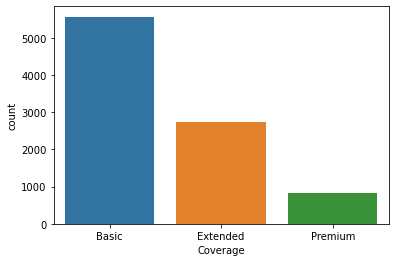

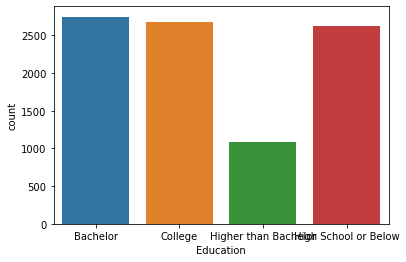

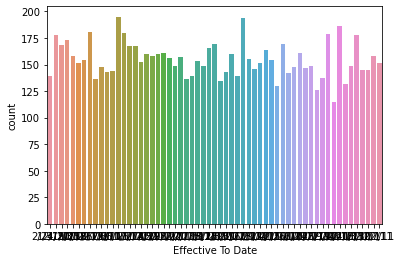

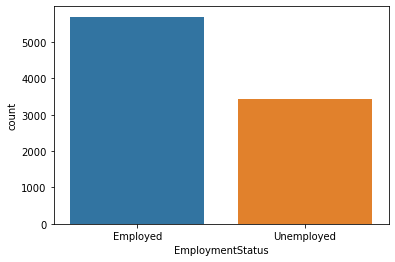

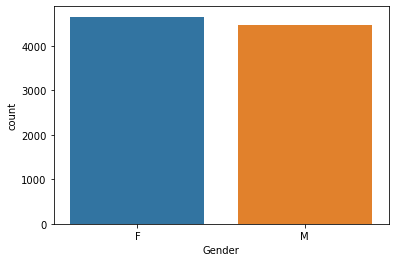

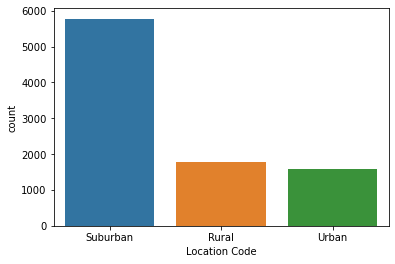

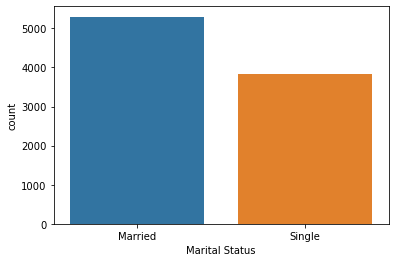

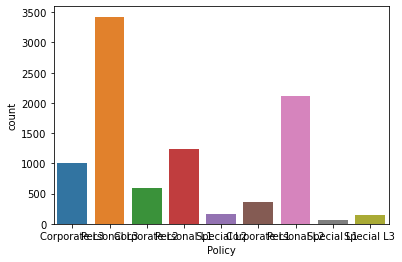

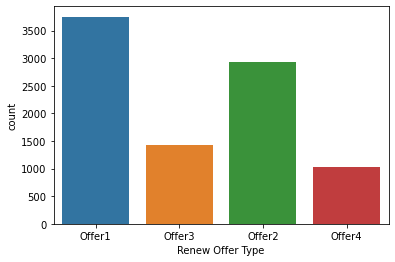

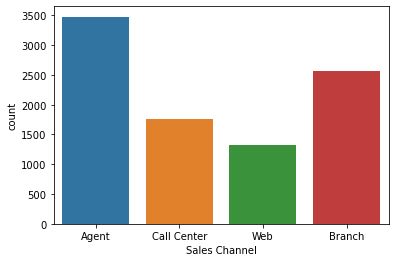

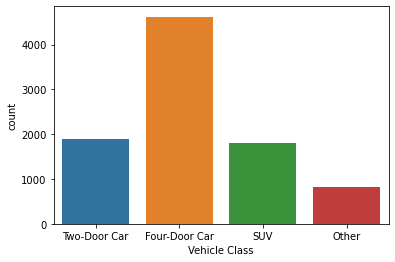

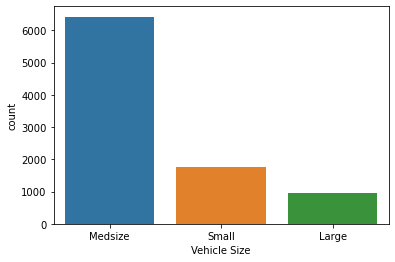

In [9]:
for column_name in categoricals.columns:
    plt.figure()
    sns.countplot(x=categoricals[column_name])
    plt.show()

In [10]:
# 4. Plot time variable. Can you extract something from it?

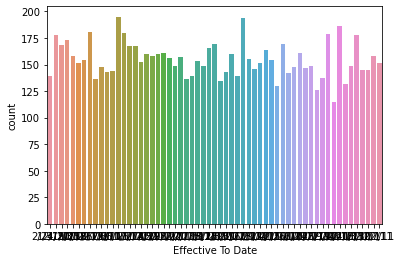

In [11]:
plt.figure()
sns.countplot(x=categoricals['Effective To Date'])
plt.show()

Or we can try to group any of the other columns by the column 'Effective To Date'.
Let's try to do it with the most important column in our dataset - 'Total Claim Amount'.


In [12]:
time_variable_plot = data.pivot_table(index='Effective To Date', aggfunc=np.sum).reset_index()
time_variable_plot.head()

,Effective To Date,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,1/1/11,1.353682e+06,5844277,13761,2140,6432,52,504,67480.593660
1,1/10/11,1.409177e+06,7608324,17967,2978,9288,92,594,85972.708496
2,1/11/11,1.429904e+06,6262729,15175,2092,8651,37,488,67581.173191
3,1/12/11,9.944216e+05,4672102,10971,1816,5930,44,376,46798.483797
4,1/13/11,1.094103e+06,5445367,13192,2152,6904,79,466,66437.397299


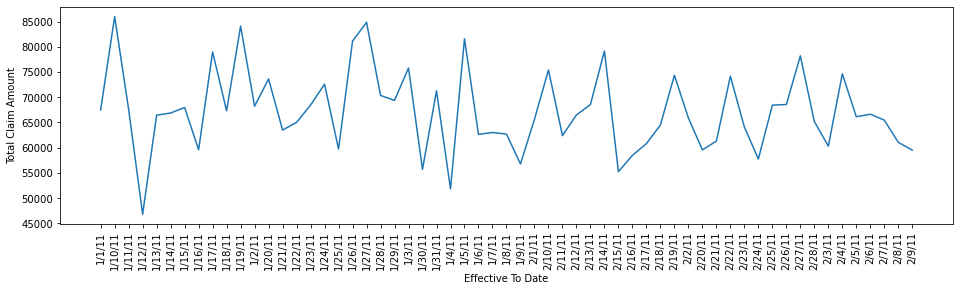

In [13]:
fig,ax = plt.subplots(figsize=(16,4))
sns.lineplot(y='Total Claim Amount', x='Effective To Date', data=time_variable_plot)
plt.xticks(rotation=90)
plt.show()

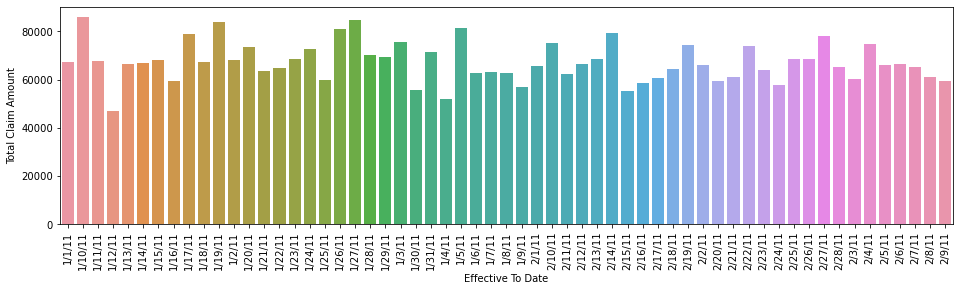

In [14]:
fig,ax = plt.subplots(figsize=(16,4))
sns.barplot(y='Total Claim Amount', x='Effective To Date', data=time_variable_plot)
plt.xticks(rotation=90)
plt.show()


So, we grouped 'Total Claim Amount' by 'Effective To Date', but there is no particular tendecy that we can notice here.
